In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import cross_val_score,  StratifiedKFold
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer

In [2]:
train_df=pd.read_csv("D:/STUDIA/ROK_II/Magisterka/Modele/Dane pierwotne/Dane_do_uczenia_N.csv", encoding="utf-8")
del train_df['Unnamed: 0']

In [3]:
train_df

,ENSG00000143512.11,ENSG00000130433.6,ENSG00000088726.14,ENSG00000149948.12,ENSG00000147689.15,ENSG00000181143.14,ENSG00000105278.9,ENSG00000086506.2,ENSG00000124102.4,ENSG00000175793.11,...,ENSG00000222024.2,ENSG00000255043.1,ENSG00000229418.2,ENSG00000249518.1,ENSG00000279301.1,ENSG00000251276.1,ENSG00000217236.1,ENSG00000046774.9,ENSG00000260958.2,scale
0,13.858287,0.000000,1.154857,24.252002,4.619429,4105.517523,0.000000,0.000000,10.393715,120.105154,...,38.110289,13.858287,0.000000,32.336003,0.000000,3.464572,0.000000,0.000000,0.0,N0
1,1.070588,0.000000,2.141177,1.070588,1.070588,28.905887,0.000000,0.000000,4.282354,44.964713,...,0.000000,0.000000,0.000000,0.000000,1.070588,2.141177,0.000000,0.000000,0.0,N0
2,2.947029,17.682172,3.683786,13.998386,2.210272,42.731916,319.015856,1.473514,13.261629,375.009401,...,0.000000,0.000000,0.000000,8.841086,0.000000,0.000000,0.736757,0.000000,0.0,N0
3,0.510553,4.594978,1.531659,14.806042,2.042213,0.510553,10.211063,1.021106,12.763829,320.627385,...,0.000000,1.021106,0.510553,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,N0
4,2.145565,2.860754,15.734146,207.404649,0.715188,69.373279,1.430377,1.430377,745.941546,949.770253,...,0.000000,0.000000,0.000000,0.715188,0.000000,0.715188,0.000000,0.715188,0.0,N0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,27.385616,90.372531,0.000000,301.241772,27.385616,60.248354,16.431369,0.000000,657.254774,230.039171,...,5.477123,2.738562,0.000000,0.000000,0.000000,0.000000,2.738562,2.738562,0.0,NX
970,1.893234,1.262156,2.524312,8.835093,0.000000,8.835093,1.893234,1.262156,32.184980,1532.257472,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NX
971,6.297732,0.572521,0.572521,3.435127,0.572521,11.450422,4.007648,0.572521,1.717563,25.190929,...,0.000000,0.000000,0.000000,0.000000,1.145042,0.000000,0.000000,0.000000,0.0,NX
972,6.108815,0.000000,0.000000,82.468996,0.000000,21.380851,0.000000,18.326444,201.590879,3301.814245,...,0.000000,0.000000,3.054407,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NX


In [4]:
train_df=train_df.loc[(train_df['scale']!='NX')]

In [5]:
train_df

,ENSG00000143512.11,ENSG00000130433.6,ENSG00000088726.14,ENSG00000149948.12,ENSG00000147689.15,ENSG00000181143.14,ENSG00000105278.9,ENSG00000086506.2,ENSG00000124102.4,ENSG00000175793.11,...,ENSG00000222024.2,ENSG00000255043.1,ENSG00000229418.2,ENSG00000249518.1,ENSG00000279301.1,ENSG00000251276.1,ENSG00000217236.1,ENSG00000046774.9,ENSG00000260958.2,scale
0,13.858287,0.000000,1.154857,24.252002,4.619429,4105.517523,0.000000,0.000000,10.393715,120.105154,...,38.110289,13.858287,0.000000,32.336003,0.000000,3.464572,0.000000,0.000000,0.0,N0
1,1.070588,0.000000,2.141177,1.070588,1.070588,28.905887,0.000000,0.000000,4.282354,44.964713,...,0.000000,0.000000,0.000000,0.000000,1.070588,2.141177,0.000000,0.000000,0.0,N0
2,2.947029,17.682172,3.683786,13.998386,2.210272,42.731916,319.015856,1.473514,13.261629,375.009401,...,0.000000,0.000000,0.000000,8.841086,0.000000,0.000000,0.736757,0.000000,0.0,N0
3,0.510553,4.594978,1.531659,14.806042,2.042213,0.510553,10.211063,1.021106,12.763829,320.627385,...,0.000000,1.021106,0.510553,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,N0
4,2.145565,2.860754,15.734146,207.404649,0.715188,69.373279,1.430377,1.430377,745.941546,949.770253,...,0.000000,0.000000,0.000000,0.715188,0.000000,0.715188,0.000000,0.715188,0.0,N0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,34.548309,0.822579,18.096733,547.837468,9.870945,2.467736,805.304626,314.225094,536.321365,37832.865830,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.645158,0.000000,0.0,N1
407,5.160331,0.000000,2.948761,56.026453,1.474380,11.057853,16.955374,2.948761,43.494220,2322.886229,...,0.737190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,N1
408,0.000000,0.000000,2.985051,7.960137,0.995017,3.980069,1.990034,0.995017,0.000000,35.820617,...,0.000000,0.000000,49.750857,0.000000,0.000000,0.000000,0.995017,0.000000,0.0,N1
409,13.307318,5.322927,29.276099,1189.674187,6.653659,0.000000,3.992195,0.000000,444.464405,9578.607153,...,1.330732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,N1


In [6]:
y=train_df['scale']
del train_df['scale']

In [7]:
train_df

,ENSG00000143512.11,ENSG00000130433.6,ENSG00000088726.14,ENSG00000149948.12,ENSG00000147689.15,ENSG00000181143.14,ENSG00000105278.9,ENSG00000086506.2,ENSG00000124102.4,ENSG00000175793.11,...,ENSG00000203837.4,ENSG00000222024.2,ENSG00000255043.1,ENSG00000229418.2,ENSG00000249518.1,ENSG00000279301.1,ENSG00000251276.1,ENSG00000217236.1,ENSG00000046774.9,ENSG00000260958.2
0,13.858287,0.000000,1.154857,24.252002,4.619429,4105.517523,0.000000,0.000000,10.393715,120.105154,...,0.000000,38.110289,13.858287,0.000000,32.336003,0.000000,3.464572,0.000000,0.000000,0.0
1,1.070588,0.000000,2.141177,1.070588,1.070588,28.905887,0.000000,0.000000,4.282354,44.964713,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.070588,2.141177,0.000000,0.000000,0.0
2,2.947029,17.682172,3.683786,13.998386,2.210272,42.731916,319.015856,1.473514,13.261629,375.009401,...,0.000000,0.000000,0.000000,0.000000,8.841086,0.000000,0.000000,0.736757,0.000000,0.0
3,0.510553,4.594978,1.531659,14.806042,2.042213,0.510553,10.211063,1.021106,12.763829,320.627385,...,1.021106,0.000000,1.021106,0.510553,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,2.145565,2.860754,15.734146,207.404649,0.715188,69.373279,1.430377,1.430377,745.941546,949.770253,...,0.000000,0.000000,0.000000,0.000000,0.715188,0.000000,0.715188,0.000000,0.715188,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,34.548309,0.822579,18.096733,547.837468,9.870945,2.467736,805.304626,314.225094,536.321365,37832.865830,...,0.822579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.645158,0.000000,0.0
407,5.160331,0.000000,2.948761,56.026453,1.474380,11.057853,16.955374,2.948761,43.494220,2322.886229,...,0.737190,0.737190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
408,0.000000,0.000000,2.985051,7.960137,0.995017,3.980069,1.990034,0.995017,0.000000,35.820617,...,6.965120,0.000000,0.000000,49.750857,0.000000,0.000000,0.000000,0.995017,0.000000,0.0
409,13.307318,5.322927,29.276099,1189.674187,6.653659,0.000000,3.992195,0.000000,444.464405,9578.607153,...,0.000000,1.330732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [8]:
scaler = StandardScaler()

In [9]:
zestaw_caly = scaler.fit_transform(train_df)
zestaw_caly = np.array(zestaw_caly)
caly_label = np.array(y)


In [10]:
zestaw_caly

array([[-0.06538572, -0.12200532, -0.13749793, ..., -0.14358805,
        -0.07777697, -0.0898969 ],
       [-0.09635767, -0.12200532, -0.12838068, ..., -0.14358805,
        -0.07777697, -0.0898969 ],
       [-0.09181291,  0.06958853, -0.11412125, ..., -0.09050218,
        -0.07777697, -0.0898969 ],
       ...,
       [-0.09895065, -0.12200532, -0.12058015, ..., -0.07189367,
        -0.07777697, -0.0898969 ],
       [-0.06672018, -0.06432914,  0.12244663, ..., -0.14358805,
        -0.07777697, -0.0898969 ],
       [ 0.96201209, -0.12200532,  2.26693407, ...,  0.1373884 ,
        -0.07777697, -0.0898969 ]])

In [11]:
caly_label

array(['N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0',
       'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0',
       'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0',
       'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0',
       'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0',
       'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0',
       'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0',
       'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0',
       'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0',
       'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0',
       'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0',
       'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0',
       'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0',
       'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N

## 2. Dobrane parametry

### 2.1 Dobieranie parametrów

In [12]:
ftwo_scorer = make_scorer(fbeta_score,average='binary', beta=1,labels=['N0','N1'],pos_label='N1',greater_is_better=True)


In [13]:
ftwo_scorer

make_scorer(fbeta_score, average=binary, beta=1, labels=['N0', 'N1'], pos_label=N1)

In [14]:
param_grid = {
    'n_neighbors':range(1,110,1),
    'weights': ['uniform'],
    'algorithm': ['auto'],
    'leaf_size': range(1,20,1),
    'p': [1,2]
}


In [19]:
knn_2 = KNeighborsClassifier()
grid_search_2 = GridSearchCV(estimator = knn_2, param_grid = param_grid, 
                          cv = 5, n_jobs = 1, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 4142 candidates, totalling 20710 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'algorithm': ['auto'], 'leaf_size': range(1, 20),
                         'n_neighbors': range(1, 110), 'p': [1, 2],
                         'weights': ['uniform']},
             scoring=make_scorer(fbeta_score, average=binary, beta=1, labels=['N0', 'N1'], pos_label=N1),
             verbose=1)

In [20]:
grid_search_2.best_score_

0.19682072829131653

In [21]:
grid_search_2.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}

In [22]:
#grid_search_2.best_score_ 0.22566667636025242

grid_search_2.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

### 3. Z dobranymi parametrami 


In [23]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dane_do_zapisu_2=pd.DataFrame()
licznik=1
wart_2=[]
for train, test in kfold.split(zestaw_caly, caly_label):
    reg = KNeighborsClassifier(leaf_size=1, n_neighbors=1, weights= 'uniform',p=1,algorithm='auto')
    reg.fit(zestaw_caly[train], caly_label[train])
    predykcje=reg.predict(zestaw_caly[test])
    dane_folda_2=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_2=pd.concat([dane_do_zapisu_2,dane_folda_2])
    blad=fbeta_score(caly_label[test], predykcje, average='binary', beta=1,labels=['N0','N1'],pos_label='N1')
    wart_2.append(blad)
    licznik+=1

In [24]:
dane_do_zapisu_2.to_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\Klasa_N_KNN.csv')

In [25]:
sum(wart_2)/5

0.2987881468376824

In [26]:
wart_2

[0.3157894736842105,
 0.23529411764705882,
 0.4285714285714285,
 0.13333333333333333,
 0.380952380952381]

In [27]:
cf_matrix = confusion_matrix(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'])

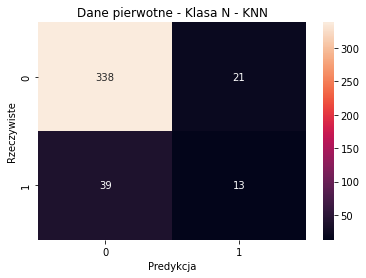

In [28]:

ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, fmt='g')

ax.set_title('Dane pierwotne - Klasa N - KNN')
plt.ylabel('Rzeczywiste')
plt.xlabel('Predykcja')
plt.show()


In [30]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

precision = precision_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['N0','N1'], average='binary',pos_label='N1')
recall = recall_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['N0','N1'], average='binary',pos_label='N1')
f1score=fbeta_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['N0','N1'], average='binary',pos_label='N1', beta=1)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1score: %.3f' % f1score)

Recall: 0.250
Precision: 0.382
F1score: 0.302
